In [3]:
%matplotlib inline
import numpy as np

# Topological properties of genome-scale metabolic model

In this exercise you will analyze the topology of an up-to-date Genome-Scale Model (GSM) for the yeast Saccharomyces cerevisiae . The GSM is known as the "S. cerevisiae iMM904 metabolic network" and was obtained from the Systems Biology Research Group (Mo, M.L., Palsson, B.O., Herrgard, M.J., Connecting extracellular metabolomic profiles to intracellular metabolic states in yeast. BMC Systems Biology. 3:37 (2009)). A topological analysis of this GSM can be performed using Cytoscape and NetworkAnalyzer, one of Cytoscape's core "Tools".

I have converted the stoichiometry matrix (S) to a simple table of relationships (or interactions) between a Reaction and the Metabolites that participate in that reaction. This is formally known as a bipartite graph as there are two types of nodes and interactions can only exist between the two types. A simple example of a bipartite graph could be defined between flags and the colors they contain (see example below), or movies and the actors who act in them. 

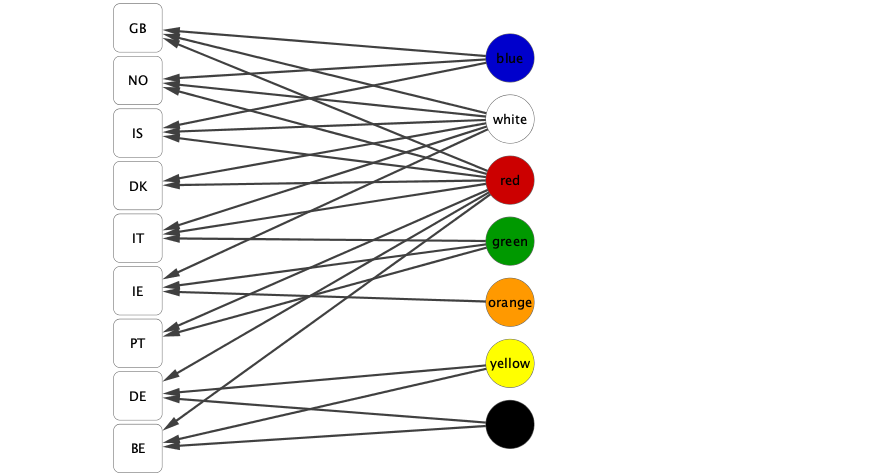

Creating a bipartite graph based on the binary form of S, will allow us to analyze the network topology as was described in Palsson 2006 - Systems Biology - properties of reconstructed networks, Chapter 7 - Topological properties.

In [4]:
import networkx as nx

In [5]:
from cobra.io import read_sbml_model

In [6]:
model = read_sbml_model('../data/iJO1366.xml.gz')

In [7]:
model

Name,iJO1366
Memory address,0x0142589580
Number of metabolites,1805
Number of reactions,2583
Number of groups,36
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [8]:
from cobra.util import create_stoichiometric_matrix

In [15]:
S = create_stoichiometric_matrix(model)

In [16]:
S.dtype

dtype('float64')

Things to do:
* Calculate degrees of freedom
* Maybe move stripes exercise out of lecture
* Visualize network
* Visualize network with currency metabolites removed

Text(0.5, 0, 'Metabolites')

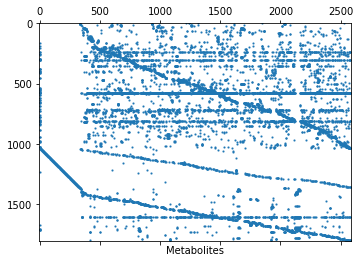

In [10]:
import matplotlib.pyplot as plt
plt.spy(S, precision=0.01, markersize=1)
plt.xlabel('Reactions')
plt.xlabel('Metabolites')

Discuss with you're partner:
* What are the horizontal lines? Which metabolites do you think they might be?Try to come up with suggestions for the heaviest lines, less heavy and the most dotted lines.
* What is the diagonal line?
* What is the vertical line (0th column)? (Note: This is hard, you may not know this)

### Construct the binary $\mathbf{\hat{S}}$


\begin{array}
\hat{S}_{ij} = 0 & \text{if} & S_{ij} = 0 \\
\hat{S}_{ij} = 1 & \text{if} & S_{ij} \neq 0
\end{array}

In [11]:
S

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1., -1.,  1.]])

In [25]:
Sbin = np.where(S!=0., 1., 0.)

### Task compute reaction and compound adjacency matrices

The reaction adjacency matrix.

In [ ]:
reaction_adjacency_matrix = Sbin.T.dot(Sbin)

In [28]:
reaction_adjacency_matrix.shape

(2583, 2583)

In [29]:
reaction_adjacency_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 2., 1.],
       [0., 0., 0., ..., 2., 7., 1.],
       [0., 0., 0., ..., 1., 1., 2.]])

The compound adjacency matrix.

In [30]:
reaction_adjacency_matrix.diagonal().max()

106.0

In [31]:
compound_adjacency_matrix = S.dot(S.T)

In [32]:
compound_adjacency_matrix.shape

(1805, 1805)

### Generate networks from the adjacency matrices

In [37]:
reaction_centric_network = nx.from_numpy_matrix(reaction_adjacency_matrix)
compound_centric_network = nx.from_numpy_matrix(compound_adjacency_matrix)

### Look at degree distributions

In [128]:
degrees = compound_centric_network.degree()

In [129]:
degrees_np = np.array(degrees)

In [130]:
degrees_np

In [135]:
degrees_np.sort(axis=1)

In [136]:
degrees_np

In [111]:
degrees = compound_centric_network.degree()

degrees = {k: v for k, v in sorted(degrees, key=lambda item: item[1], reverse=True)}

In [114]:
np.array(list(degrees.items()))

In [113]:
top10

In [100]:
model.metabolites[576]

### Calculate the degree distributions

In [43]:
reaction_centric_network = nx.from_numpy_matrix(S.T.dot(S))

In [45]:
reaction_centric_network

In [ ]:
network.dr

In [46]:
nx.draw_spring(network)

In [47]:
from pyvis.network import Network

In [48]:
vis = Network(notebook=True)

In [49]:
vis.from_nx(network)

In [ ]:
vis.show('network.html')

In [53]:
reaction.reactants

In [54]:
bipartite = nx.Graph()
for reaction in model.reactions:
    for metabolite in reaction.reactants:
        bipartite.add_edge(reaction, metabolite)
    for metabolite in reaction.products:
        bipartite.add_edge(reaction, metabolite)

In [56]:
bipartite.degree()